In [1]:
from Thick_Shell_Class import Dark_Photon_Thick_Shell
from Thick_Shell_Class import s2app_func

In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
number_of_epsilon = 300
number_of_m = 300
epsilon_list = np.logspace(-10,0,number_of_epsilon) #this is the base 10 exponent range
m_list = np.logspace(-11,-4.5,number_of_m)

In [4]:
ft_to_ev_inverse = 1544855.50049
v_sense = 10**(-6)
Vapp = 3000
R0 = 2 * ft_to_ev_inverse
R1 = 2.5 * ft_to_ev_inverse

In [5]:
def Delta_V(epsilon,m,R2):
    s2app = s2app_func(epsilon,m,R1,R2,Vapp)
    DPTS = Dark_Photon_Thick_Shell(epsilon,m,R1,R2,s2app,fast=True)
    return Vapp - DPTS.Vpp(R0)

In [6]:
def get_constraint(thickness_in_cm):
    R2 = (2.5 + thickness_in_cm * 0.0328084) * ft_to_ev_inverse 
    Delta_V_evaluated = np.zeros(shape=(number_of_epsilon,number_of_m))
    for (i,m) in enumerate(m_list):
        for (j,epsilon) in enumerate(epsilon_list):
            Delta_V_evaluated[i][j] = Delta_V(epsilon,m,R2)
    constraint = (Delta_V_evaluated<v_sense)
    return constraint

In [7]:
constraint_1cm = get_constraint(1)

In [8]:
constraint_10cm = get_constraint(10)

In [9]:
constraint_20cm = get_constraint(20)

In [10]:
constraint_30cm = get_constraint(30)

In [11]:
constraint_40cm = get_constraint(40)

<string>:2: RuntimeWarning: overflow encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars
<string>:2: RuntimeWarning: overflow encountered in double_scalars
C:\Users\samue\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


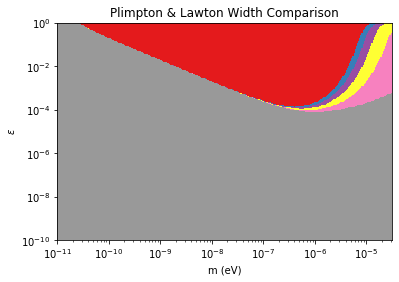

In [17]:
plt.pcolormesh(m_list,epsilon_list,constraint_1cm.T.astype(int)+constraint_10cm.T.astype(int)
               +constraint_20cm.T.astype(int)+constraint_30cm.T.astype(int)+constraint_40cm.T.astype(int),cmap='Set1')
#always plot the transpose with colormesh
#plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.ylabel('$\epsilon$')
plt.xlabel('m (eV)')
plt.title("Plimpton & Lawton Width Comparison")
plt.savefig("Plimpton & Lawton Width Comparison.png",dpi=300)